# Introducing the `digits` dataset
- If you have tried doing some machine learning excercises before, there are good chances you have encountered the "MNIST Handwritten Digits" dataset.
- This is probably the most common "easy" dataset in computer vision, and is widely used as a *benchmark*, i.e. to test the performance of a model compared to others.
- A similar handwritten digits dataset is available in `scikit-learn` itself:

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
data = digits["data"]
labels = digits["target"]

Let's first have a look at how the dataset looks like.
The shape of `data` is (n. of samples, n. of features). Here each feature is the value of a pixel.

In [15]:
print(data.shape)

(1797, 64)


The shape of `labels` is just (n. of samples). Labels are digits from 0 to 9.

In [16]:
print(labels.shape)
print(labels)

(1797,)
[0 1 2 ... 8 9 8]


Let's also view how one example digit looks like. As you can see, they are low resolution images of handwritten digits.

Label: 0


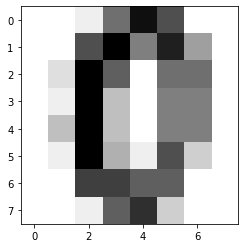

In [52]:
import matplotlib.pyplot as plt

plt.imshow(data[10].reshape(8, 8), cmap=plt.cm.gray_r)
print("Label:", labels[10])

# Part 1: Dimensionality reduction
- Each "data point" (each image of a digit) is a 64-dimensional object, with each dimension representing the grayscale value of one pixel.
- This is a first example of a relatively high dimensional dataset. (Relatively, because large images could have thousands of pixels, while this is low-resolution).
- As such, it's difficult to find structure in it with our eyes and geometrical intuition, because we can't imagine these images as points in a 64-dimensional space.

## Principal Components Analysis

- To visualize the structure of a high-dimensional dataset in fewer dimensions, we can resort to **dimensionality reduction algorithms**.
- Dimensionality reduction finds **the most relevant combinations of features** that best identify elements of our dataset.
- This is much more useful than choosing only a few random features.

Let's now use `scikit-learn` to perform Principal Component Analysis, a simple and **linear** dimensionality reduction algorithm.

In [36]:
from sklearn.decomposition import PCA

transformed_data = PCA(n_components=2).fit_transform(data)

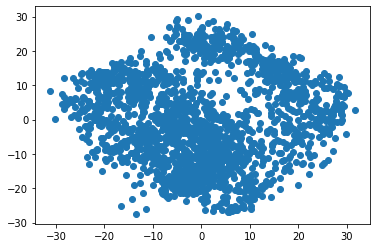

In [37]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

To see if there is meaningful structure in this dataset, we can see how the labels relate to these dimensions:

**Exercise:** plot each data point with a color corresponding to its label 0-9. Do you observe any structure?

**Solution:**

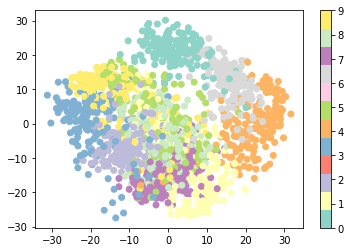

In [40]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap=plt.cm.Set3)
plt.colorbar()

**Exercise:** repeat the same using another dimensionality reduction algorithm, this time non-linear: `sklearn.manifold.TSNE`. What do you observe?
**Solution:**

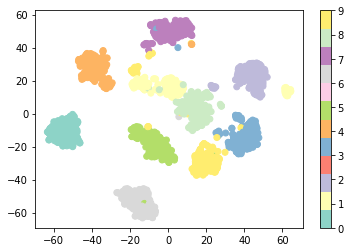

In [44]:
from sklearn.manifold import TSNE

transformed_data = TSNE(n_components=2).fit_transform(data)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap=plt.cm.Set3)
plt.colorbar()

## How does PCA work?
## What else can we use dimensionality reduction for?
See slides.

We can now also look at how much more important the first principal components are compared to the other ones:

[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


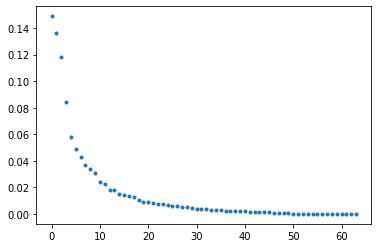

In [90]:
pca = PCA().fit(data)

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, ".")

# Part 2: Classification

- The task for which the `digits` dataset was originally devised is, of course, identifying which handwritten digit is in each image.
- This is a useful task in the real world, where machines read postcodes on letters to sort them, and digits on cheques to validate them automatically.
- We have labels in the training dataset, therefore this is a **supervised classification** task. Supervised classification is the most common of modern ML tasks.

## Support Vector Classifiers

- Today, large-scale, high-dimensional classification tasks on complex data are almost always solved with deep neural networks.
- However, simpler algorithms are still used for smaller and lower-dimensional datasets. One of these is called the Support Vector Classifier.

Before we proceed, it's time to introduce the split between training set and test set.
- Having a separate test set, composed of data kept out of the training, is important in order to check whether our model is able to *generalise properly* on data it has not seen before.
- More on train/test split in the afternoon.

In [122]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3)

Let's now look at the call signature of `SVC` in `sklearn`. We see it has many hyperparameters.

In [2]:
from sklearn.svm import SVC

SVC?

To understand what they mean, let's look at how Support Vector Machines work.

*See slides*

We can now proceed and fit our model.

In [3]:
svc = SVC(gamma=0.001)

# training
svc.fit(data_train, labels_train)

# looking at prediction on training set
predicted_train = svc.predict(data_train)

# looking at prediction on test set
predicted_test = svc.predict(data_test)

NameError: name 'data_train' is not defined

Let's plot an example of predicted digit label. This is an image the model has never seen!

Predicted: 6 ground truth: 6


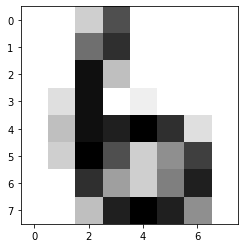

In [141]:
plt.imshow(data_test[10].reshape(8, 8), cmap=plt.cm.gray_r)
print("Predicted:", predicted_test[10], "ground truth:", labels_test[10])

We can look at the **accuracy** of this model:

In [142]:
sum(labels_test == predicted_test)/len(predicted_test)

0.987037037037037

We can also have a look at the **confusion matrix** on the test set:

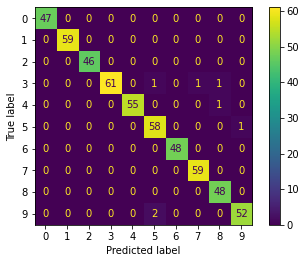

In [139]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc, data_test, labels_test)